In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import networkx as nx
import re
import os
import pickle
import requests
import json
import urllib.request

In [ ]:
# load pickle files dc and marvel

dc = pickle.load(open('dc.pkl', 'rb'))
marvel = pickle.load(open('marvel.pkl', 'rb'))
marvel.head()

CharacterName                 WikiLink
0    Abomination  Abomination (character)
1  Absorbing Man            Absorbing Man
2        Abraxas                      NaN
3          Abyss                      NaN
4         Access                      NaN

In [ ]:
# remove lines where 'WikiLink' is NaN

marvel = marvel[marvel['WikiLink'].notnull()]
marvel['WikiLink'] = marvel['WikiLink'].str.replace(' ', '_')

# remove lines were "WikiLink" contains this character "|"

marvel = marvel[~marvel['WikiLink'].str.contains('\|')]


# remove lines where "wikilink" contains caracters that is not a part of the alphabet or a number

marvel = marvel[marvel['WikiLink'].str.contains('^[a-zA-Z0-9_]*$')]
marvel = marvel.reset_index(drop=True)
marvel


CharacterName                  WikiLink
0    Absorbing Man             Absorbing_Man
1        Airstrike           Dmitri_Bukharin
2             Ajak                      Ajak
3             Ajax                      Ajak
4        Liz Allan                 Liz_Allan
..             ...                       ...
757       Zheng Zu                  Zheng_Zu
758      Ziggy Pig  Ziggy_Pig_and_Silly_Seal
759     Arnim Zola                Arnim_Zola
760          Zuras          list_of_Eternals
761          Zzzax                     Zzzax

[762 rows x 2 columns]

In [ ]:
# remove lines in dc where 'WikiLink' is NaN and replave ' ' with '_' in 'WikiLink' column and reset index

dc = dc[dc['WikiLink'].notnull()]
dc['WikiLink'] = dc['WikiLink'].str.replace(' ', '_')

# remove lines were "WikiLink" contains this character "|"

dc = dc[~dc['WikiLink'].str.contains('\|')]

# remove lines where "wikilink" contains caracters that is not a part of the alphabet or a number

dc = dc[dc['WikiLink'].str.contains('^[a-zA-Z0-9_]*$')]
dc = dc.reset_index(drop=True)
dc


CharacterName              WikiLink
0         Abin Sur              Abin_Sur
1     Abby Holland          Abby_Holland
2     Adam Strange          Adam_Strange
3    Agent Liberty         Agent_Liberty
4         Air Wave              Air_Wave
..             ...                   ...
249        Vulture         Terrible_Trio
250              X  X_of_the_Underground
251       Xenofobe              Xenofobe
252            Xeo                   Xeo
253          Xombi                 Xombi

[254 rows x 2 columns]

In [ ]:
with open('Abby Holland dc.txt', 'r') as f:
    text = f.read()
    #print(re.findall(r'\[\[([^]]+)', text)) # print the hyperlinks in the file

    #If the print contains "|" print the last part of the link and if it does not contain "|" print the whole link



#save the hyperlinks in a list called "links" and print the list 

links = []
for i in re.findall(r'\[\[([^]]+)', text):
    if "|" in i:
        links.append(i.split("|")[-1])
    else:
        links.append(i)


print(links)

#print the number of links

print(len(links))

['Special:ApiFeatureUsage', '250px', 'Swamp Thing', 'Eric Powell', 'DC Comics', 'Swamp Thing', 'Len Wein', 'Bernie Wrightson', 'Empathy', 'Telepathy', 'Telekinesis', 'comic book', 'DC Comics', 'Universe', 'Swamp Thing', 'Tef\\u00e9 Holland', 'psychic', 'Swamp Thing', 'Len Wein', 'Bernie Wrightson', 'Dorling Kindersley', 'Crystal Reed', 'television series', 'DC streaming service', 'CDC', 'Transylvania', 'Romania', 'Anton Arcane', 'superstitious', 'hiking', 'swimming', 'diving', 'rock climbing', 'sight seeing', 'nature', 'ecology', 'environmentalism', 'empathy', 'first aid', 'nurse', 'clinic', 'land mine', 'Un-Man', 'Patchwork Man', 'Matthew Cable', 'Swamp Thing', " Swamp Thing saves Abby's life for the first time. Artwork by [[Bernie Wrightson", 'werewolf', 'blood transfusion', 'chandelier', 'Alec Holland', 'supernatural', 'elemental', 'Gotham City', 'Batman', 'nebulous', 'Louisiana', 'Bayou', 'Hurricane Carmen', 'Nebiros', 'telepath', 'Armageddon', 'old age', 'telekinesis', 'bigoted', 

In [ ]:
G = nx.Graph()

for i in os.listdir():
    if "dc" in i:
        G.add_node(i, type='dc')
    else:
        G.add_node(i, type='marvel')

# info about the graph

print(nx.info(G))

Graph with 1004 nodes and 0 edges


C:\Users\scitu\AppData\Local\Temp\ipykernel_10932\554701483.py:11: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


In [ ]:
# check if any of the words in the list "links" is of the words in a node in the graph

for i in links:
    for j in G.nodes:
        if i in j:
            G.add_edge('Abby_Holland', j)
            


print(nx.info(G))
    


Graph with 1005 nodes and 9 edges


C:\Users\scitu\AppData\Local\Temp\ipykernel_10932\479339043.py:10: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


In [ ]:
for i in links:
    if i in dc['CharacterName'].values:
        print(i)
    elif i in marvel['CharacterName'].values:
        print(i)
    else:
        continue

Anton Arcane
Batman


In [15]:
# go through the txt files in os_listdir() and create a node with the name of the file and add an attribute if they are from dc or marvel and open the file and find the hyperlinks in the file and if the hyperlinks has any word that is a node in the graph add an edge between the node and the hyperlinks. if the hyperlinks has a word that is not a node in the graph skip it. If there is an edge already skip it
G = nx.Graph()


for i in os.listdir():
    if i.endswith('.txt'):
        if "dc" in i:
            G.add_node(i, type='dc')
        else:
            G.add_node(i, type='marvel')
        with open(i, 'r') as f:
            text = f.read()
            links = []
            
            for j in re.findall(r'\[\[([^]]+)', text):
                if "|" in j:
                    links.append(j.split("|")[-1])
                else:
                    links.append(j)
                    for j in links:
                        for i in G.nodes:
                            if j in i:
                                G.add_edge(i, j)
                        else:
                            continue

RuntimeError: dictionary changed size during iteration

In [13]:
 print(nx.info(G))
 print(G.nodes)
print(G.edges)

Graph with 996 nodes and 992 edges
['Abby Holland dc.txt', 'Abigail Brand marvel.txt', 'Abin Sur dc.txt', 'Abner Jenkins marvel.txt', 'Abraham Cornelius marvel.txt', 'Abraham Whistler marvel.txt', 'Absorbing Man marvel.txt', 'Adam Strange dc.txt', 'Adam Warlock marvel.txt', 'Adrienne Frost marvel.txt', 'Agatha Harkness marvel.txt', 'Agent Liberty dc.txt', 'Air Wave dc.txt', 'Ajak marvel.txt', 'Al MacKenzie marvel.txt', 'Albert Rothstein dc.txt', 'Aldrich Killian marvel.txt', 'Aleksander Lukin marvel.txt', 'Aleta Ogord marvel.txt', 'Alex Power marvel.txt', 'Alex Wilder marvel.txt', 'Alexander Bont marvel.txt', 'Alexander Goodwin Pierce marvel.txt', 'Alicia Masters marvel.txt', 'Alistair Smythe marvel.txt', 'Alyssa Moy marvel.txt', 'Amadeus Cho marvel.txt', 'Amanda Sefton marvel.txt', 'Amanda Waller dc.txt', 'Amazo dc.txt', 'Ambush Bug dc.txt', 'Amelia Voght marvel.txt', 'Anarky dc.txt', 'Ancient One marvel.txt', 'Andrew Chord marvel.txt', 'Andy Lorimer marvel.txt', 'Angel and the Ape dc

C:\Users\scitu\AppData\Local\Temp\ipykernel_12980\1840773919.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


In [ ]:
# list all txt files in the directory

os.listdir()





['Abby Holland dc.txt',
 'Abigail Brand marvel.txt',
 'Abin Sur dc.txt',
 'Abner Jenkins marvel.txt',
 'Abraham Cornelius marvel.txt',
 'Abraham Whistler marvel.txt',
 'Absorbing Man marvel.txt',
 'Adam Strange dc.txt',
 'Adam Warlock marvel.txt',
 'Adrienne Frost marvel.txt',
 'Agatha Harkness marvel.txt',
 'Agent Liberty dc.txt',
 'Air Wave dc.txt',
 'Ajak marvel.txt',
 'Al MacKenzie marvel.txt',
 'Albert Rothstein dc.txt',
 'Aldrich Killian marvel.txt',
 'Aleksander Lukin marvel.txt',
 'Aleta Ogord marvel.txt',
 'Alex Power marvel.txt',
 'Alex Wilder marvel.txt',
 'Alexander Bont marvel.txt',
 'Alexander Goodwin Pierce marvel.txt',
 'Alicia Masters marvel.txt',
 'Alistair Smythe marvel.txt',
 'Alyssa Moy marvel.txt',
 'Amadeus Cho marvel.txt',
 'Amanda Sefton marvel.txt',
 'Amanda Waller dc.txt',
 'Amazo dc.txt',
 'Ambush Bug dc.txt',
 'Amelia Voght marvel.txt',
 'Anarky dc.txt',
 'Ancient One marvel.txt',
 'Andrew Chord marvel.txt',
 'Andy Lorimer marvel.txt',
 'Angel and the Ape d

In [ ]:
# create a node for abby holland with the attribute 'dc' and add it to the graph and add the edges between abby holland and the characters in the list "links" that is in the column "CharacterName" in the dc dataframe or marvel dataframe else skip it
G = nx.Graph()

G.add_node('Abby_Holland', type='dc')
for i in links:
    if i in dc['CharacterName'].values:
        G.add_edge('Abby_Holland', i)
    elif i in marvel['CharacterName'].values:
        G.add_edge('Abby_Holland', i)
    else:
        continue

In [ ]:
#info about the graph

print(nx.info(G))


Graph with 3 nodes and 2 edges


C:\Users\scitu\AppData\Local\Temp\ipykernel_13860\2738765219.py:3: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


In [ ]:
# Now do the same thing for Abigail_Brand_marvel 

with open('Abigail_Brand_marvel.txt', 'r') as f:
    text = f.read()

    #print(re.findall(r'\[\[([^]]+)', text)) # print the hyperlinks in the file

    #If the print contains "|" print the last part of the link and if it does not contain "|" print the whole link

links1 = []
for i in re.findall(r'\[\[([^]]+)', text):
    if "|" in i:
        links1.append(i.split("|")[-1])
    else:
        links1.append(i)

print(links1)


['Special:ApiFeatureUsage', 'Beast', 'Lockheed', 'John Cassaday', 'Marvel Comics', 'Astonishing X-Men', '2004', 'Joss Whedon', 'John Cassaday', 'Human Mutant', 'Alpha Flight', 'S.W.O.R.D.', 'X-Men', 'Beast', 'Pyrokinesis', 'Special Agent', 'fictional character', 'American comic book', 'Marvel Comics', 'Joss Whedon', 'John Cassaday', 'Astonishing X-Men', 'S.W.O.R.D.', 'Astonishing X-Men', '2004', 'Joss Whedon', 'John Cassaday', 'S.W.O.R.D.', 'S.H.I.E.L.D.', 'Skrulls', 'Ord', 'mutant', 'Colossus', 'X-Men', 'Nick Fury', 'Maria Hill', 'Danger', 'Henry McCoy', 'Wolverine', 'Armor', 'Shadowcat', 'doomsday device', 'sobriquet', 'Skrull', 'Dum Dum Dugan', 'Mister Fantastic', 'Savage Land', 'Beta Ray Bill', 'Jessica Drew', 'Lockheed', 'Henry Peter Gyrich', 'Noh-Varr', 'Adam X', 'Jazinda', 'Karolina Dean', 'Hepzibah', "Death's Head", 'Avengers vs. X-Men', 'Legion', 'Infinity', 'Rocket Raccoon', 'Peter Quill', 'Angela', 'Broo', 'Agent Carter', 'Tara Butters', 'Michele Fazekas', 'Kris Anka', 'All-

In [ ]:
# check if any of the words in the list "links" is in the file colum "CharacterName" in the dc dataframe or mavel dataframe else skip it

for i in links1:
    if i in dc['CharacterName'].values:
        print(i)
    elif i in marvel['CharacterName'].values:
        print(i)
    else:
        continue

Maria Hill
Mister Fantastic
Beta Ray Bill
Henry Peter Gyrich
Jazinda
Rocket Raccoon
Hulkling
Maria Hill
Peter Corbeau
Living Laser
Madame Masque
Kang the Conqueror


In [ ]:
# create a node for "Abigail Brand" with the attribute 'Marcel' and add it to the graph and add the edges between Abigail Brand and the characters in the list "links1" that is in the column "CharacterName" in the dc dataframe or marvel dataframe else skip it

G.add_node('Abigail_Brand', type='marvel')
for i in links1:
    if i in dc['CharacterName'].values:
        G.add_edge('Abigail_Brand', i)
    elif i in marvel['CharacterName'].values:
        G.add_edge('Abigail_Brand', i)
    else:
        continue

#info about the graph

print(nx.info(G))


Graph with 15 nodes and 13 edges


C:\Users\scitu\AppData\Local\Temp\ipykernel_13860\3623376214.py:14: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


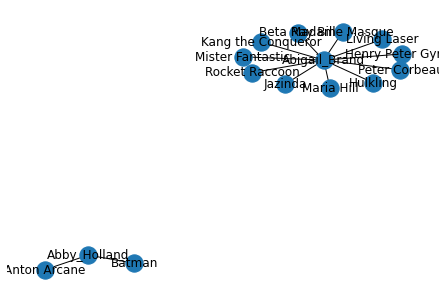

In [ ]:
#print the graph with the nodes and edges

nx.draw(G, with_labels=True)
plt.show()



In [ ]:
# create a node for every file in os_listdir() and add and attribute to the node that if the file contains "dc" the attribute is "dc" else the attribute is "marvel". then remobe
G = nx.Graph()

for i in os.listdir():
    if "dc" in i:
        G.add_node(i, type='dc')
    else:
        G.add_node(i, type='marvel')

        

In [ ]:
# go through the files in os_listdir() and open the file and find the hyperlinks in the file and if the hyperlinks has any word that is a node in the graph add an edge between the node and the hyperlinks. if the hyperlinks has a word that is not a node in the graph skip it. If there is an edge already skip it

for i in os.listdir():
     if i.endswith(".txt"):
        with open(i, 'r') as f:
            text = f.read()
            links = []
            for i in re.findall(r'\[\[([^]]+)', text):
                if "|" in i:
                    links.append(i.split("|")[-1])
                else:
                    links.append(i)
            for i in links:
                if i in G.nodes():
                    G.add_edge(i, i)
                else:
                    continue

            


In [ ]:
# Go through the os.listdir() with the files ending with "_dc" and create a node with the attribute dc. Then read the files and create a edge between the node and the characters in the file that is in the column "CharacterName" in the dc dataframe or marvel dataframe else skip it

for i in os.listdir():
    if i.endswith("Abby_Holland_dc.txt"):
        G.add_node(i, type='dc')
        with open(i, 'r') as f:
            text = f.read()

            links = []
            for i in re.findall(r'\[\[([^]]+)', text):
                if "|" in i:
                    links.append(i.split("|")[-1])
                else:
                    links.append(i)

            #print(links)

            # check if any of the words in the list "links" is in the file colum "CharacterName" in the dc dataframe or mavel dataframe else skip it

            for i in links:
                if i in dc['CharacterName'].values:
                    G.add_edge(i, i)
                elif i in marvel['CharacterName'].values:
                    G.add_edge(i, i)
                else:
                    continue


 

In [ ]:
print(links)

['Special:ApiFeatureUsage', 'Hulk', 'The Incredible Hulk', 'Herb Trimpe', 'Marvel Comics', 'The Incredible Hulk', 'Steve Englehart', 'Herb Trimpe', 'Lethal Legion', 'General \\"Thunderbolt\\" Ross', 'Pyro', 'Flight', 'Electromagnetism', 'American comic book', 'Marvel Comics', 'The Incredible Hulk', 'Steve Englehart', 'Herb Trimpe', 'The Incredible Hulk', 'humanoid', 'Con Ed', 'nuclear power plant', 'New York City', 'terrorist', 'dynamo', 'chain reaction', 'sentience', 'Hulk', 'Hawkeye', 'Chicago', 'Power Man', 'Bruce Banner', 'Mephisto', 'miniseries', 'Secret Wars II', 'Thing', 'West Coast Avengers', 'fundamental force', 'Graviton', 'Quantum', 'Halflife', 'short-circuited', 'S.H.I.E.L.D.', 'Thunderbolt Ross', 'Rick Jones', 'Betty Ross Banner', 'Iron Man', 'Marvel Comics Presents', 'Cable', 'New Avengers', 'Raft', 'Sensational She-Hulk', 'Helicarrier', 'The Mighty Avengers', 'MODOK Superior', 'Fear Itself', 'intelligence', 'brainwaves', 'hovering', 'evaporate', 'The Incredible Hulk', 'M

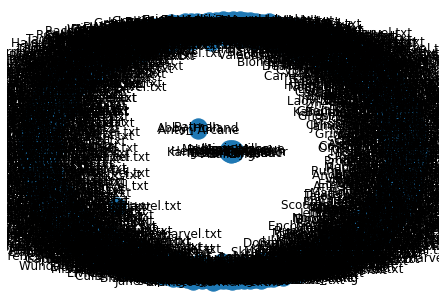

In [ ]:
#print the graph with the nodes and edges

nx.draw(G, with_labels=True)
plt.show()


In [ ]:
# info about the graph

print(nx.info(G))


Graph with 1004 nodes and 0 edges


C:\Users\scitu\AppData\Local\Temp\ipykernel_4712\3129372944.py:3: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))
